In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV,LeaveOneOut
from scipy.interpolate import RectBivariateSpline

import ksource_py as ks

In [2]:
np.set_printoptions(precision=3)

In [3]:
# Abrir lista de particulas

folder = "Ftes_tracks"
tracks = folder+"/GF12p_n"
trasl = [118.5497276, -102.897199, 5.0]
rot = [0.0, 0.0, -158*np.pi/180.0]
x2z = True

set_params = False
plist = ks.PList(ks.PTRAC_read, tracks, trasl=trasl, rot=rot, switch_x2z=x2z, set_params=set_params)
if set_params:
    print("N =", plist.N)
    print("I =", plist.I)
    print("err =", np.sqrt(plist.p2))

In [ ]:
# Crear KSource

J = 3.669E+15
metric = ks.SepVarMetric(ks.Lethargy(10), ks.SurfXY(0), ks.Polar())
s = ks.KSource(metric, bw="silv", J=J)

In [4]:
# Ajustar KSource

N = 1e4 # Cantidad de particulas a utilizar
s.fit(plist=plist, N=N)

Calculating bw ... Done
Optimal bw (silv) = [0.469 4.22  4.253 0.076 0.616]


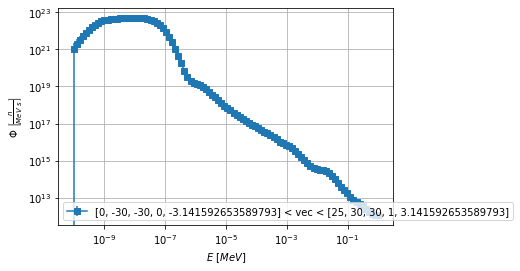

In [5]:
# Graficos en E

vec0 = [0, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, 1,np.pi]
EE = np.logspace(-10,0,100)
fig,scores = s.plot_E(EE, vec0, vec1)
plt.show()

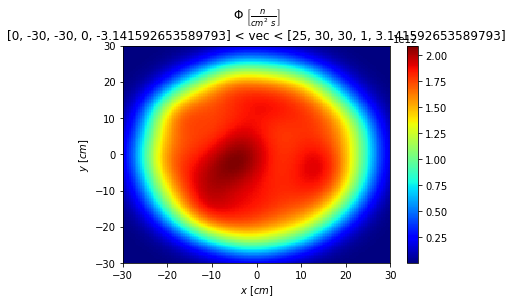

In [6]:
# Graficos en xy

vec0 = [0, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, 1,np.pi]
xx = np.linspace(-30,30,30)
yy = np.linspace(-30,30,30)
fig,scores = s.plot2D_integr([xx,yy], [1,2], vec0, vec1)
plt.show()

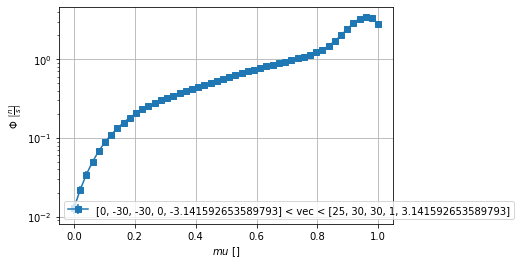

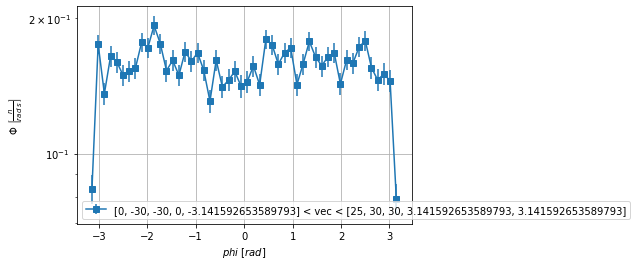

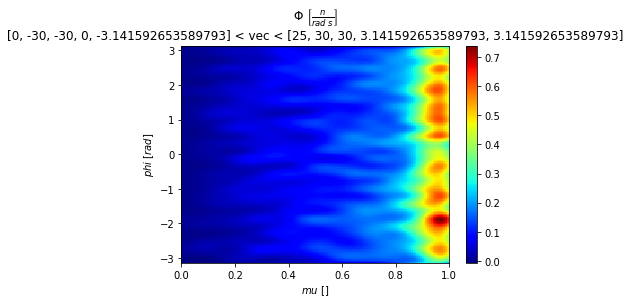

In [7]:
# Graficos de direccion

metric = ks.SepVarMetric(ks.Lethargy(10), ks.SurfXY(0), ks.Polar())
s = ks.KSource(metric, bw=[0.5, 10,10, 0.05,np.pi/90])
s.fit(plist=plist, N=1e4)

vec0 = [0, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, 1,np.pi]
mm = np.linspace(0,1,50)
fig,scores = s.plot_integr(mm, 3, vec0, vec1)
plt.show()

vec0 = [0, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, np.pi,np.pi]
pp = np.linspace(-np.pi,np.pi,50)
fig,scores = s.plot_integr(pp, 4, vec0, vec1)
plt.show()

vec0 = [0, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, np.pi,np.pi]
mm = np.linspace(0,1,30)
pp = np.linspace(-np.pi,np.pi,30)
fig,[scores,errs] = s.plot2D_integr([mm,pp], [3,4], vec0, vec1)
plt.show()